In [1]:
import numpy as np
import scipy.stats as sps
from IPython.core.debugger import Tracer
from collections import OrderedDict

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.sans-serif'] = 'Arial'
from matplotlib.ticker import MultipleLocator
import seaborn as sns
# %gui qt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set(style='ticks', font='sans-serif')
sns.set_context('notebook', font_scale=1)
from matplotlib.ticker import FormatStrFormatter
from matplotlib.collections import LineCollection
from matplotlib.patches import ConnectionPatch
from __future__ import division

import matplotlib.gridspec as gridspec

# import plotly
# import plotly.graph_objs as go
# import plotly.offline as plo
# plotly.offline.init_notebook_mode(connected=True)

import scipy.interpolate as spi

import ipywidgets as widgets

import pickle

import signatures as sg

import joblib as jl


def caption_letter(axis, letter, prop_above=0.1, prop_left=0.1):
    yl = axis.get_ylim()
    xl = axis.get_xlim()
    axis.text(xl[0]-prop_left*np.diff(xl), yl[1]+prop_above*np.diff(yl), letter, horizontalalignment='right', fontsize=18, fontweight='bold')

cat1_color = [.8047, .3125, .3398]
cat2_color = [.4766, .7344, .793]



## Section 1. Confidence divergence

In [4]:
slopes_u, slopes_g = pickle.load(open('slopes.p'))

In [5]:
SDs_u = np.linspace(0, 1.8, 32)
SDs_g = np.linspace(0, 3, 32)
cat_params_u = np.linspace(0, 2.5, 32)
cat_params_g = np.linspace(0.3, 2, 32)

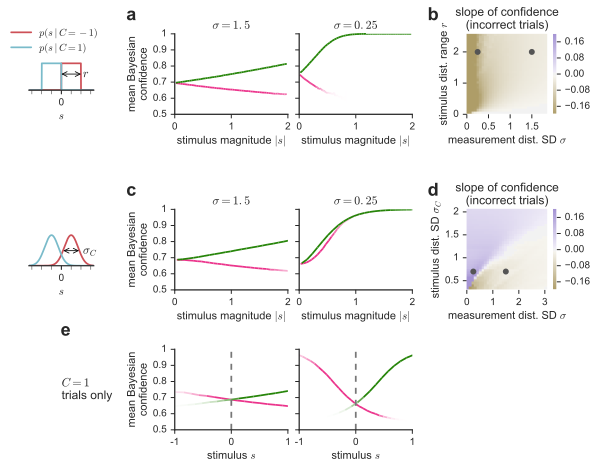

In [21]:
nBins = 50
nTrials = int(5e6) # 5e6

reload(sg)
mpl.rcParams['xtick.major.pad']='4'
mpl.rcParams['ytick.major.pad']='4'
mpl.rcParams['xtick.major.size']='4'
mpl.rcParams['ytick.major.size']='4'
mpl.rcParams['xtick.minor.size']='4'
mpl.rcParams['ytick.minor.size']='4'
mpl.rcParams['axes.labelpad']='4'

figsize = (7.5,5.5) # W, H
group_h_margin = .24
h_margin = .15
row_height = (1-h_margin-group_h_margin)/3

cat_plot_w = .12
cat_plot_w_margin = .15
cat_plot_rel_h = .4
cat_plot_h = cat_plot_rel_h*row_height

heatmap_w = .2
heatmap_w_margin = .09

heatmap_prop_left = .35

wspace=.1

caption_letter_prop_above = .17

# gs1 = grdispec.GridSpec()
# cats1 = plt.subplots(gridspec_kw={'left': 0, 'right': cat_plot_w, 'top': 1-(row_height-cat_plot_h)/2, 'bottom': 1-(row_height-cat_plot_h)/2-cat_plot_h})

gs1 = gridspec.GridSpec(2,1)
gs1.update(left=0, right=cat_plot_w, top=1-(row_height-cat_plot_h)/2, bottom=1-row_height-group_h_margin-cat_plot_h-(row_height-cat_plot_h)/2, hspace=(group_h_margin+row_height-cat_plot_h)/cat_plot_h)

cats1 = plt.subplot(gs1[0])
cats2 = plt.subplot(gs1[1])

gs2 = gridspec.GridSpec(1, 2)
gs2.update(left=cat_plot_w+cat_plot_w_margin, right=1-heatmap_w-heatmap_w_margin, top=1, bottom=1-row_height, wspace=wspace)

u1 = plt.subplot(gs2[0])
u2 = plt.subplot(gs2[1])


gs3 = gridspec.GridSpec(2, 2)
gs3.update(left=cat_plot_w + cat_plot_w_margin, right=1-heatmap_w-heatmap_w_margin, top=1-row_height-group_h_margin, bottom=0, hspace=h_margin/row_height, wspace=wspace)
# fig, cats2 = plt.subplots(gridspec_kw={'left': 0, 'right': cat_plot_w, 'top': 1-row_height-group_h_margin-(row_height-cat_plot_h)/2, 'bottom': 1-row_height-group_h_margin-(row_height-cat_plot_h)/2-cat_plot_h})


g1 = plt.subplot(gs3[0])
g2 = plt.subplot(gs3[1])
g3 = plt.subplot(gs3[2])
g4 = plt.subplot(gs3[3])

gs4 = gridspec.GridSpec(2,1)
gs4.update(left=1-heatmap_w, right=1, top=1, bottom=row_height+h_margin, hspace=group_h_margin/row_height)
uheat = plt.subplot(gs4[0])
gheat = plt.subplot(gs4[1])




# HANDLES ###################
# cats1     u1   u2     uheat
# 
# cats2     g1   g2     gheat
#           g3   g4


unif_range = 2
xl = [0,2]
yl = [.5,1]
distxl=[-3.3,3.3]
lo_SD = .25
hi_SD = 1.5
s = np.linspace(distxl[0],distxl[1],500)
markersize=12 # dots on heatmap
#### ROW 1 ##########

stimdist_1, stimdist_n1 = sg.stimulus_distributions(cat_type='uniform', unif_range=unif_range)
cats1.plot(s, stimdist_1.pdf(s), '-', color=cat1_color, label='$p(s \mid C = -1)$')
cats1.plot(s, stimdist_n1.pdf(s), '-', color=cat2_color, label='$p(s \mid C = 1)$')
cats1.set_xlim(distxl)
cats1.set_ylim([0,.6])
cats1.set_yticks([])
# ax[0][0].legend()
# apos = ax[0][0].get_position()
# ax[0][0].set_position(np.array(apos.bounds)+[lshift,hshift,lshift_mult,-2*hshift])
cats1.xaxis.set_major_locator(MultipleLocator(20))
cats1.xaxis.set_minor_locator(MultipleLocator(1))
# cats1.tick_params('both', length=4.5, which='minor')
cats1.set_xticks([0])
cats1.set_xticklabels([0])
cats1.set_xlabel('$s$')
l = cats1.legend(bbox_to_anchor=(1.2, 2.2))
l.axes.set_position(l.axes.get_position())

cats1.annotate(s='', xy=(-.2,.3), xytext=(2.2,.3), arrowprops=dict(arrowstyle='<->', lw=0.8))
cats1.text(2.2, 0.3, '$r$', verticalalignment='center')


data = sg.experiment(cat_type='uniform', nTrials=nTrials, unif_overlap=0, meas_SD=hi_SD, unif_range=unif_range)
sg.plot_divergence_panel(u1, data, nBins=nBins)
u1.set_ylim(yl)
u1.set_xlim(xl)
# ax[0][1].legend(loc='upper left')
u1.set_title('$\sigma={}$'.format(hi_SD))
caption_letter(u1, 'a', prop_left=.34, prop_above=caption_letter_prop_above)
u1.xaxis.set_major_locator(MultipleLocator(1))

data = sg.experiment(cat_type='uniform', nTrials=nTrials, unif_overlap=0, meas_SD=lo_SD, unif_range=unif_range)
sg.plot_divergence_panel(u2, data, ylabel=False, nBins=nBins)
u2.set_xlim(xl)
u2.set_ylim(yl)
u2.set_title('$\sigma={}$'.format(lo_SD))
u2.xaxis.set_major_locator(MultipleLocator(1))

xxx= sg.make_heatmap(slopes_u.T, SDs_u, cat_params_u, uheat, xticks=[0,.5,1,1.5], yticks=[0,1,2])
# apos = ax[0][3].get_position()
# ax[0][3].set_position(np.array(apos.bounds)+[.03,0,0,0])
uheat.set_ylabel('stimulus dist. range $r$')
uheat.set_xlabel('measurement dist. SD $\sigma$')
uheat.set_title('slope of confidence\n(incorrect trials)', size=12)
uheat.plot(np.interp([hi_SD, lo_SD], SDs_u, range(len(SDs_u))), len(cat_params_u)-np.interp([2,2], cat_params_u, range(len(cat_params_u))), '.', color='#555555', markersize=markersize)
caption_letter(uheat, 'b', prop_left=heatmap_prop_left, prop_above=caption_letter_prop_above)

stimdist_1, stimdist_n1 = sg.stimulus_distributions(cat_type='gaussian', unif_range=unif_range, norm_mean=1, norm_SD=.7)
cats2.plot(s, stimdist_1.pdf(s), '-', color=cat1_color, label='cat. 1')
cats2.plot(s, stimdist_n1.pdf(s), '-', color=cat2_color, label='cat. 2')
cats2.set_xlim(distxl)
cats2.set_ylim([0,.6])
cats2.set_yticks([])
cats2.set_xticklabels('')
cats2.xaxis.set_major_locator(MultipleLocator(20))
cats2.xaxis.set_minor_locator(MultipleLocator(1))
# cats2.tick_params('both', length=4.5, which='minor')
cats2.set_xticks([0])
cats2.set_xticklabels([0])
cats2.set_xlabel('$s$')

cats2.annotate(s='', xy=(0,.28), xytext=(2,.28), arrowprops=dict(arrowstyle='<->', lw=0.8))
cats2.text(2.2, 0.28, '$\sigma_C$', verticalalignment='center')
# cats2.annotate(s='', xy=(1,.55), xytext=(1,.82), arrowprops=dict(arrowstyle='->', lw=0.8))
# cats2.text(1, .87, '$\mu_C$', horizontalalignment='center')

data = sg.experiment(cat_type='gaussian', nTrials=nTrials, norm_mean=1, norm_SD=.7, meas_SD=hi_SD)
sg.plot_divergence_panel(g1, data, nBins=nBins)
g1.set_xlim(xl)
g1.set_ylim(yl)
g1.set_title('$\sigma={}$'.format(hi_SD))
caption_letter(g1, 'c', prop_left=.34, prop_above=caption_letter_prop_above)
g1.xaxis.set_major_locator(MultipleLocator(1))

sg.plot_divergence_panel(g3, data, absolute=False, cat=1, nBins=nBins)
g3.set_xlim([-1, 1])
g3.set_ylim(yl)
g3.set_xlabel('stimulus $s$')
g3.axvline(0, color='#777777', linestyle='--')
caption_letter(g3, 'e', prop_left=.92, prop_above=caption_letter_prop_above)
g3.xaxis.set_major_locator(MultipleLocator(1))
g3.text(-3, 0.69, '$C=1$\ntrials only')

data = sg.experiment(cat_type='gaussian', nTrials=nTrials, norm_mean=1, norm_SD=.7, meas_SD=lo_SD)
sg.plot_divergence_panel(g2, data, ylabel=False, nBins=nBins)
g2.set_xlim(xl)
g2.set_ylim(yl)
g2.set_title('$\sigma={}$'.format(lo_SD))
g2.xaxis.set_major_locator(MultipleLocator(1))

sg.make_heatmap(slopes_g.T, SDs_g, cat_params_g, gheat, yticks=[.5,1,1.5,2], xticks=[0,1,2,3])
gheat.set_ylabel('stimulus dist. SD $\sigma_C$')
gheat.set_xlabel('measurement dist. SD $\sigma$')
gheat.set_title('slope of confidence\n(incorrect trials)', size=12)
gheat.plot(np.interp([hi_SD, lo_SD], SDs_g, range(len(SDs_g))), len(cat_params_g)-np.interp([.7,.7], cat_params_g, range(len(cat_params_g))), '.', color='#555555', markersize=markersize)
caption_letter(gheat, 'd', prop_left=heatmap_prop_left, prop_above=caption_letter_prop_above)

sg.plot_divergence_panel(g4, data, ylabel=False, absolute=False, cat=1, nBins=nBins)
g4.set_xlim([-1, 1])
g4.set_ylim(yl)
g4.set_xlabel('stimulus $s$')
g4.axvline(0, color='#777777', linestyle='--')
g4.xaxis.set_major_locator(MultipleLocator(1))



sns.despine(ax=cats1, left=True)
sns.despine(ax=cats2, left=True)


fig = plt.gcf()
fig.set_size_inches(figsize)
fig.savefig('/Users/will/Google Drive/Will - Confidence/Manuscripts/Signatures/sigs_figs/divergence_tmp.pdf', bbox_inches='tight')

In [ ]:
# recompute slopes
slopes_u = sg.incorrect_slopes(SDs=SDs_u, cat_params=cat_params_u)
slopes_g = sg.incorrect_slopes(SDs=SDs_g, cat_params=cat_params_g, cat_type='gaussian')

## Section 2. Mean confidence at neutral evidence

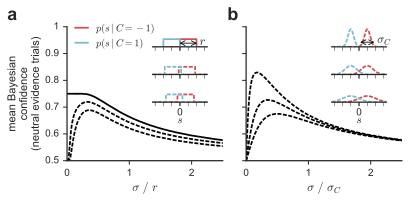

In [28]:
nSigs = 200 # 200
nTrials = 1e6 # 1e6

sigratio = np.linspace(np.finfo(float).eps,2.5,nSigs)
unif_range = 2
SD = sigratio*unif_range


unif_overlaps = [0, .15, .3]
unif_linestyles = ['-', '--', '--']
dashstyle = [4,1.5]
sig_Cs = [0.35, 0.7, 1]
norm_mean = [1,1,1]

prop_above = .05


fig, axes = plt.subplots(1, 2, sharey='row', figsize=(6,2.4))
plt.subplots_adjust(wspace=.15, hspace=.5)

out = np.zeros(len(SD))
for j, overlap in enumerate(unif_overlaps):
    for i, meas_SD in enumerate(SD):
        out[i] = sg.meanconf_sim(cat_type='uniform', meas_SD=meas_SD, unif_overlap=overlap, unif_range=unif_range, nTrials=int(nTrials))
    l, = axes[0].plot(sigratio, out, color='k')
    if unif_linestyles[j] != '-':
        l.set_dashes(dashstyle)


axes[0].set_xlabel('$\sigma\ /\ r$',fontsize=12)
axes[0].set_ylim([.5,1])
axes[0].set_xlim([sigratio[0], sigratio[-1]])
axes[0].set_ylabel('mean Bayesian\nconfidence\n(neutral evidence trials)')
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%g'))
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%g'))
axes[0].xaxis.set_major_locator(MultipleLocator(1))
caption_letter(axes[0], 'a', prop_left=.32, prop_above=prop_above)
apos = axes[0].get_position()

x = [apos.x0, apos.x1]
y = [apos.y0, apos.y1]
sns.despine(ax=axes[0])

#### INSETS ##########
LWYHM = [.55, .35, .85, .15, 0.16] # L point, width, Y point, height, margin
ylim = [0,1.3]
s = np.linspace(-4,4,500)
for j, overlap in enumerate(unif_overlaps):
    ax = plt.axes([float(x[0]+np.diff(x)*LWYHM[0]), float(y[0]+np.diff(y)*LWYHM[2])-LWYHM[4]*j, float(np.diff(x)*LWYHM[1]), float(np.diff(y)*LWYHM[3])])
    stimdist_1, stimdist_n1 = sg.stimulus_distributions(cat_type='uniform', unif_range=unif_range, unif_overlap=overlap)
    l,=ax.plot(s, stimdist_1.pdf(s), '-', color=cat1_color, label='$p(s \mid C = -1)$')
    if unif_linestyles[j] != '-':
        l.set_dashes(dashstyle)
    l,=ax.plot(s, stimdist_n1.pdf(s), '-', color=cat2_color, label='$p(s \mid C = 1)$')
    if unif_linestyles[j] != '-':
        l.set_dashes(dashstyle)
    
    ax.set_yticks([])
    ax.set_xticks(np.linspace(-3,3,7))
    ax.set_xlim([-3.3,3.3])
    ax.set_xticklabels([])
    ax.set_ylim(ylim)

    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0])
    
    if j==0:
        ax.annotate(s='', xy=(-.3,.24), xytext=(2.3,.24), arrowprops=dict(arrowstyle='<->', lw=0.8))
        ax.text(2.4, 0.33, '$r$', verticalalignment='center')
        
        l = ax.legend(bbox_to_anchor=(.2, 1.6), handlelength=1.3)
        l.axes.set_position(l.axes.get_position())

        

    elif j==2:
        ax.set_xticklabels([0])
        ax.set_xlabel('$s$', labelpad=-2)
        ax.tick_params(axis='both', which='major', pad=2)

    
    sns.despine(ax=ax, left=True)
    
    
for j, sig_C in enumerate(sig_Cs):
    for i, meas_SD in enumerate(SD):
        out[i] = sg.meanconf_sim(cat_type='gaussian', meas_SD=meas_SD, norm_mean=norm_mean[j], norm_SD=sig_C, nTrials=int(nTrials))
    l,=axes[1].plot(sigratio, out, '--', color='k')
    l.set_dashes(dashstyle)


axes[1].set_xlabel('$\sigma\ /\ \sigma_C$',fontsize=12)
axes[1].set_ylim([.5,1])
axes[1].set_xlim([sigratio[0], sigratio[-1]])
axes[1].xaxis.set_major_formatter(FormatStrFormatter('%g'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%g'))
axes[1].xaxis.set_major_locator(MultipleLocator(1))
caption_letter(axes[1], 'b', prop_left=.05, prop_above=prop_above)
apos = axes[1].get_position()

x = [apos.x0, apos.x1]
y = [apos.y0, apos.y1]
sns.despine(ax=axes[1])

#### INSETS ##########
s = np.linspace(-4,4,500)
for j, sig_C in enumerate(sig_Cs):
    ax = plt.axes([float(x[0]+np.diff(x)*LWYHM[0]), float(y[0]+np.diff(y)*LWYHM[2])-LWYHM[4]*j, float(np.diff(x)*LWYHM[1]), float(np.diff(y)*LWYHM[3])])
    stimdist_1, stimdist_n1 = sg.stimulus_distributions(cat_type='gaussian', norm_mean=norm_mean[j], norm_SD=sig_C)
    l,=ax.plot(s, stimdist_1.pdf(s), '-', color=cat1_color)
    l.set_dashes(dashstyle)
    l,=ax.plot(s, stimdist_n1.pdf(s), '-', color=cat2_color)
    l.set_dashes(dashstyle)

    ax.set_yticks([])
    ax.set_xticks(np.linspace(-3,3,7))
    ax.set_xlim([-3.3,3.3])
    ax.set_ylim(ylim)
    ax.set_xticklabels([])

    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0])
    
    if j==0:
        ax.annotate(s='', xy=(-.1,.3), xytext=(2.1,.3), arrowprops=dict(arrowstyle='<->', lw=0.8))
        ax.text(2.2, 0.46, '$\sigma_C$', verticalalignment='center')

    elif j==2:
        ax.set_xticklabels([0])
        ax.set_xlabel('$s$', labelpad=-2)
        ax.tick_params(axis='both', which='major', pad=2)
    
    sns.despine(ax=ax, left=True)

fig.savefig('/Users/will/Google Drive/Will - Confidence/Manuscripts/Signatures/sigs_figs/midrange.pdf', bbox_inches='tight')

## Section 3. Accuracy as function of confidence and evidence

In [ ]:
data = sg.experiment(cat_type='gaussian', nTrials=int(1e5), meas_SD=.5, norm_mean=0.5, norm_SD=0.3)

(0, 0.9)

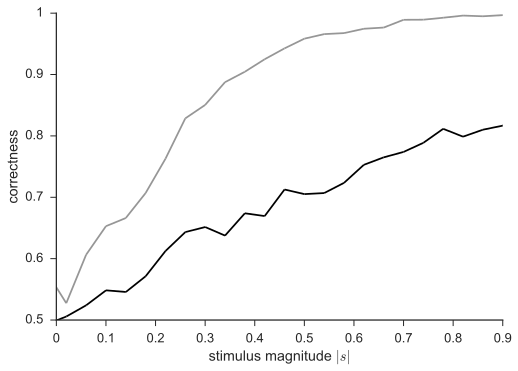

In [154]:
fig, ax = plt.subplots()
sg.plot_divergence_panel(ax, data, conf_threshold=.8, nBins=50, ylabel=True, fade_below_prop=.1, Bayes=True, cat=None, absolute=False)
plt.ylim([.5, 1])
plt.xlim([0, .9])

## Section 4. Alternative divergence signature

In [16]:
nTrials = 5e4  # 5e5
nSigmas = 8  # 16
SDs = [1.5, .25]
# cat_cat_type = 'uniform'
cat_params_u = np.linspace(0.00001,2.5,nSigmas)
cat_params_g = np.linspace(2,0,nSigmas)

# if cat_cat_type == 'uniform':
#     cat_params_u = np.linspace(0.00001,2.5,nSigmas)
#     data = [sg.experiment(cat_type='uniform', nTrials=int(nTrials), meas_SD=meas_SD, unif_range=x) for x in cat_params]
# else:
#     cat_params = np.linspace(2,.0001,nSigmas)
#     data = [sg.experiment(cat_type='gaussian', nTrials=int(nTrials), meas_SD=meas_SD, norm_mean=1, norm_SD=x) for x in cat_params]

# for d in data:
#     d['conf'] = abs(d['x'])

data_u = [[sg.experiment(cat_type='uniform', nTrials=int(nTrials), meas_SD=meas_SD, unif_range=x) for x in cat_params_u] for meas_SD in SDs]
data_g = [[sg.experiment(cat_type='gaussian', nTrials=int(nTrials), meas_SD=meas_SD, norm_mean=1, norm_SD=x) for x in cat_params_g] for meas_SD in SDs]

correct_conf_u = [[np.mean(j['conf'][j['correctness']]) for j in i] for i in data_u]
incorrect_conf_u = [[np.mean(j['conf'][~j['correctness']]) for j in i] for i in data_u]

correct_conf_g = [[np.mean(j['conf'][j['correctness']]) for j in i] for i in data_g]
incorrect_conf_g = [[np.mean(j['conf'][~j['correctness']]) for j in i] for i in data_g]

accuracy_u = [[np.mean(j['correctness']) for j in i] for i in data_u]
accuracy_g = [[np.mean(j['correctness']) for j in i] for i in data_g]

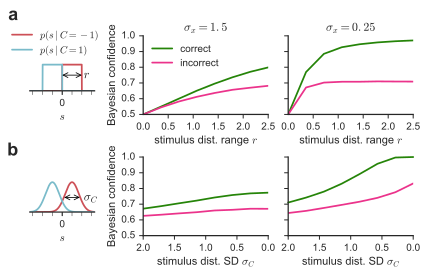

In [18]:
colors=np.array([[235,51,139], [37,132,8]])/255.0 # red, green

mpl.rcParams['xtick.major.pad']='4'
mpl.rcParams['ytick.major.pad']='4'
mpl.rcParams['xtick.major.size']='4'
mpl.rcParams['ytick.major.size']='4'
mpl.rcParams['xtick.minor.size']='4'
mpl.rcParams['ytick.minor.size']='4'
mpl.rcParams['axes.labelpad']='4'

figsize = (7.5,4.55) # W, H
group_h_margin = .13
h_margin = .15
row_height = (1-h_margin-group_h_margin)/3

cat_plot_w = .12
cat_plot_w_margin = .09
cat_plot_rel_h = .4
cat_plot_h = cat_plot_rel_h*row_height

heatmap_w = .2
heatmap_w_margin = .09

heatmap_prop_left = .35

wspace=.16

caption_letter_prop_above = .2

gs1 = gridspec.GridSpec(2,1)
gs1.update(left=0, right=cat_plot_w, top=1-(row_height-cat_plot_h)/2, bottom=1-row_height-group_h_margin-cat_plot_h-(row_height-cat_plot_h)/2, hspace=(group_h_margin+row_height-cat_plot_h)/cat_plot_h)

cats1 = plt.subplot(gs1[0])
cats2 = plt.subplot(gs1[1])

gs2 = gridspec.GridSpec(1, 2)
gs2.update(left=cat_plot_w+cat_plot_w_margin, right=1-heatmap_w-heatmap_w_margin, top=1, bottom=1-row_height, wspace=wspace)

u1 = plt.subplot(gs2[0])
u2 = plt.subplot(gs2[1])


gs3 = gridspec.GridSpec(2, 2)
gs3.update(left=cat_plot_w + cat_plot_w_margin, right=1-heatmap_w-heatmap_w_margin, top=1-row_height-group_h_margin, bottom=0, hspace=h_margin/row_height, wspace=wspace)


g1 = plt.subplot(gs3[0])
g2 = plt.subplot(gs3[1])

gs4 = gridspec.GridSpec(2,1)
gs4.update(left=1-heatmap_w, right=1, top=1, bottom=row_height+h_margin, hspace=group_h_margin/row_height)




# HANDLES ###################
# cats1     u1   u2
# cats2     g1   g2


unif_range = 2
xl = [0,1]
yl = [.5,1]
distxl=[-3.3,3.3]
lo_SD = .25
hi_SD = 1.5
nBins = 80
nTrials = int(1e4) # 2e6
s = np.linspace(distxl[0],distxl[1],500)
markersize=12 # dots on heatmap
#### ROW 1 ##########

stimdist_1, stimdist_n1 = sg.stimulus_distributions(cat_type='uniform', unif_range=unif_range)
cats1.plot(s, stimdist_1.pdf(s), '-', color=cat1_color, label='$p(s \mid C = -1)$')
cats1.plot(s, stimdist_n1.pdf(s), '-', color=cat2_color, label='$p(s \mid C = 1)$')
cats1.set_xlim(distxl)
cats1.set_ylim([0,.6])
cats1.set_yticks([])
cats1.xaxis.set_major_locator(MultipleLocator(20))
cats1.xaxis.set_minor_locator(MultipleLocator(1))
cats1.set_xticks([0])
cats1.set_xticklabels([0])
cats1.set_xlabel('$s$')
l = cats1.legend(bbox_to_anchor=(1.2, 2.2))
l.axes.set_position(l.axes.get_position())

cats1.annotate(s='', xy=(-.2,.3), xytext=(2.2,.3), arrowprops=dict(arrowstyle='<->', lw=0.8))
cats1.text(2.2, 0.3, '$r$', verticalalignment='center')


u1.plot(cat_params_u, correct_conf_u[0], color=colors[1], label='correct')
u1.plot(cat_params_u, incorrect_conf_u[0], color=colors[0], label='incorrect')
# u1.plot(cat_params_u, accuracy_u[0], 'k-')
u1.set_ylim(yl)
u1.set_xlim([cat_params_u[0], cat_params_u[-1]])
u1.set_title('$\sigma_x={}$'.format(hi_SD))
u1.set_ylabel('Bayesian confidence')
u1.set_xlabel('stimulus dist. range $r$')
u1.legend(loc='best')
caption_letter(u1, 'a', prop_left=1, prop_above=caption_letter_prop_above)

u2.plot(cat_params_u, correct_conf_u[1], color=colors[1])
u2.plot(cat_params_u, incorrect_conf_u[1], color=colors[0])
# u2.plot(cat_params_u, accuracy_u[1], 'k-')
u2.set_xlim([cat_params_u[0], cat_params_u[-1]])
u2.set_ylim(yl)
u2.set_title('$\sigma_x={}$'.format(lo_SD))
u2.set_yticklabels('')
u2.set_xlabel('stimulus dist. range $r$')

stimdist_1, stimdist_n1 = sg.stimulus_distributions(cat_type='gaussian', unif_range=unif_range, norm_mean=1, norm_SD=.7)
cats2.plot(s, stimdist_1.pdf(s), '-', color=cat1_color, label='cat. 1')
cats2.plot(s, stimdist_n1.pdf(s), '-', color=cat2_color, label='cat. 2')
cats2.set_xlim(distxl)
cats2.set_ylim([0,.6])
cats2.set_yticks([])
cats2.set_xticklabels('')
cats2.xaxis.set_major_locator(MultipleLocator(20))
cats2.xaxis.set_minor_locator(MultipleLocator(1))
# cats2.tick_params('both', length=4.5, which='minor')
cats2.set_xticks([0])
cats2.set_xticklabels([0])
cats2.set_xlabel('$s$')

cats2.annotate(s='', xy=(0,.28), xytext=(2,.28), arrowprops=dict(arrowstyle='<->', lw=0.8))
cats2.text(2.2, 0.28, '$\sigma_C$', verticalalignment='center')
# cats2.annotate(s='', xy=(1,.55), xytext=(1,.82), arrowprops=dict(arrowstyle='->', lw=0.8))
# cats2.text(1, .87, '$\mu_C$', horizontalalignment='center')

g1.plot(cat_params_g, correct_conf_g[0], color=colors[1])
g1.plot(cat_params_g, incorrect_conf_g[0], color=colors[0])
# g1.plot(cat_params_g, accuracy_g[0], 'k-')
g1.set_xlim(np.around([cat_params_g[0], cat_params_g[-1]]))
g1.set_ylim(yl)
g1.set_ylabel('Bayesian confidence')
g1.set_xlabel('stimulus dist. SD $\sigma_C$')

caption_letter(g1, 'b', prop_left=1, prop_above=.02)


g2.plot(cat_params_g, correct_conf_g[1], color=colors[1], clip_on=False)
g2.plot(cat_params_g, incorrect_conf_g[1], color=colors[0])
# g2.plot(cat_params_g, accuracy_g[1], 'k-')
g2.set_xlim(np.around([cat_params_g[0], cat_params_g[-1]]))
g2.set_ylim(yl)
g2.set_yticklabels('')
g2.set_xlabel('stimulus dist. SD $\sigma_C$')


sns.despine(ax=cats1, left=True)
sns.despine(ax=cats2, left=True)
sns.despine(ax=u1)
sns.despine(ax=u2)
sns.despine(ax=g1)
sns.despine(ax=g2)


fig = plt.gcf()
fig.set_size_inches(figsize)

fig.savefig('/Users/will/Google Drive/Will - Confidence/Manuscripts/Signatures paper/2017 Neural Computation/figs/alt_divergence.pdf', bbox_inches='tight')

In [7]:
nTrials = 5e4  # 5e5
nSigmas = 8  # 16
# SDs = [1.5, .25]
SDs = np.linspace(0.001,2,nSigmas)

# cat_params_u = np.linspace(0.00001,2.5,nSigmas)
# cat_params_g = np.linspace(2,0,nSigmas)
cat_params_g = [0,0.7]


# data_u = [sg.experiment(cat_type='uniform', nTrials=int(nTrials), meas_SD=meas_SD, unif_range=x) for x in cat_params_u for meas_SD in SDs]
data_g = [[sg.experiment(cat_type='gaussian', nTrials=int(nTrials), meas_SD=meas_SD, norm_mean=1, norm_SD=x) for meas_SD in SDs] for x in cat_params_g]

# correct_conf_u = [[np.mean(j['conf'][j['correctness']]) for j in i] for i in data_u]
# incorrect_conf_u = [[np.mean(j['conf'][~j['correctness']]) for j in i] for i in data_u]

correct_conf_g = [[np.mean(j['conf'][j['correctness']]) for j in i] for i in data_g]
incorrect_conf_g = [[np.mean(j['conf'][~j['correctness']]) for j in i] for i in data_g]

# accuracy_u = [[np.mean(j['correctness']) for j in i] for i in data_u]
accuracy_g = [[np.mean(j['correctness']) for j in i] for i in data_g]

/Users/will/anaconda/envs/py27/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/will/anaconda/envs/py27/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


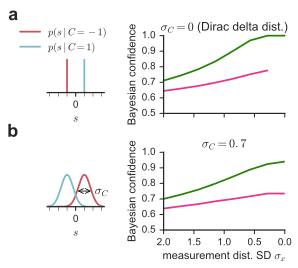

In [8]:
colors=np.array([[235,51,139], [37,132,8]])/255.0 # red, green

mpl.rcParams['xtick.major.pad']='4'
mpl.rcParams['ytick.major.pad']='4'
mpl.rcParams['xtick.major.size']='4'
mpl.rcParams['ytick.major.size']='4'
mpl.rcParams['xtick.minor.size']='4'
mpl.rcParams['ytick.minor.size']='4'
mpl.rcParams['axes.labelpad']='4'

figsize = (3.3,2.7) # W, H
hspace = .15
row_height = .4

cat_plot_w = .24
cat_plot_w_margin = .25
cat_plot_rel_h = .4
cat_plot_h = cat_plot_rel_h*row_height

caption_letter_prop_above = .2
caption_letter_prop_left = 1.2

gs1 = gridspec.GridSpec(2,1)
gs1.update(left=0, right=cat_plot_w, top=1-(row_height-cat_plot_h)/2, bottom=(row_height-cat_plot_h)/2, hspace=2.4)

cats1 = plt.subplot(gs1[0])
cats2 = plt.subplot(gs1[1])

gs2 = gridspec.GridSpec(2, 1)
gs2.update(left=cat_plot_w+cat_plot_w_margin, right=1, top=1, bottom=0, hspace=.5)

g1 = plt.subplot(gs2[0])
g2 = plt.subplot(gs2[1])


# HANDLES ###################
# cats1     g2
# cats2     g2


unif_range = 2
xl = [0,1]
yl = [.5,1]
distxl=[-3.3,3.3]
lo_SD = .25
hi_SD = 1.5
nBins = 80
nTrials = int(1e4) # 2e6
s = np.linspace(distxl[0],distxl[1],500)
markersize=12 # dots on heatmap
#### ROW 1 ##########

# stimdist_1, stimdist_n1 = sg.stimulus_distributions(cat_type='uniform', unif_range=unif_range)
cats1.plot([-1,-1],[0,.6],'-', color=cat1_color, label='$p(s \mid C = -1)$')
cats1.plot([1,1],[0,.6],'-', color=cat2_color, label='$p(s \mid C = 1)$')
cats1.set_xlim(distxl)
cats1.set_ylim([0,.6])
cats1.set_yticks([])
cats1.xaxis.set_major_locator(MultipleLocator(20))
cats1.xaxis.set_minor_locator(MultipleLocator(1))
cats1.set_xticks([0])
cats1.set_xticklabels([0])
cats1.set_xlabel('$s$')
l = cats1.legend(bbox_to_anchor=(1.2, 2.2))
l.axes.set_position(l.axes.get_position())

stimdist_1, stimdist_n1 = sg.stimulus_distributions(cat_type='gaussian', unif_range=unif_range, norm_mean=1, norm_SD=cat_params_g[1])
cats2.plot(s, stimdist_1.pdf(s), '-', color=cat1_color, label='cat. 1')
cats2.plot(s, stimdist_n1.pdf(s), '-', color=cat2_color, label='cat. 2')
cats2.set_xlim(distxl)
cats2.set_ylim([0,.6])
cats2.set_yticks([])
cats2.set_xticklabels('')
cats2.xaxis.set_major_locator(MultipleLocator(20))
cats2.xaxis.set_minor_locator(MultipleLocator(1))
# cats2.tick_params('both', length=4.5, which='minor')
cats2.set_xticks([0])
cats2.set_xticklabels([0])
cats2.set_xlabel('$s$')

cats2.annotate(s='', xy=(0,.28), xytext=(2,.28), arrowprops=dict(arrowstyle='<->', lw=0.8))
cats2.text(2.2, 0.28, '$\sigma_C$', verticalalignment='center')

g1.plot(SDs, correct_conf_g[0], color=colors[1], clip_on=False)
g1.plot(SDs, incorrect_conf_g[0], color=colors[0])
# g1.plot(cat_params_g, accuracy_g[0], 'k-')
g1.set_xlim(np.around([SDs[-1], SDs[0]]))
g1.set_ylim(yl)
g1.set_ylabel('Bayesian confidence')
g1.set_xticklabels('')
# g1.set_xlabel('measurement dist. SD $\sigma_x$')
g1.set_title('$\sigma_C=0$ (Dirac delta dist.)')

caption_letter(g1, 'a', prop_left=caption_letter_prop_left, prop_above=caption_letter_prop_above)


g2.plot(SDs, correct_conf_g[1], color=colors[1])
g2.plot(SDs, incorrect_conf_g[1], color=colors[0])
# g1.plot(cat_params_g, accuracy_g[0], 'k-')
g2.set_xlim(np.around([SDs[-1], SDs[0]]))
g2.set_ylim(yl)
g2.set_ylabel('Bayesian confidence')
g2.set_xlabel('measurement dist. SD $\sigma_x$')
g2.set_title('$\sigma_C=0.7$')

caption_letter(g2, 'b', prop_left=caption_letter_prop_left, prop_above=caption_letter_prop_above)

sns.despine(ax=cats1, left=True)
sns.despine(ax=cats2, left=True)
sns.despine(ax=g1)
sns.despine(ax=g2)


fig = plt.gcf()
fig.set_size_inches(figsize)

# fig.savefig('/Users/will/Google Drive/Will - Confidence/Manuscripts/Signatures/sigs_figs/alt_divergence_tmp.pdf', bbox_inches='tight')

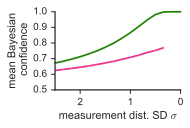

In [776]:
nTrials = 5e5  # 5e5
nSigmas = 16  # 16

SDs = np.linspace(0.001,2.5,nSigmas)
mu_C = 1

data = [sg.experiment(cat_type='gaussian', nTrials=int(nTrials), meas_SD=meas_SD, norm_mean=mu_C, norm_SD=0) for meas_SD in SDs]

fig, ax = plt.subplots(1,1,figsize=(2.25,1.4))
sg.plot_divergence_panel2(ax, data, SDs, mix_white_at_inaccuracy=.6)

ax.xaxis.set_major_locator(MultipleLocator(1))


plt.gcf().savefig('/Users/will/Google Drive/Will - Confidence/Manuscripts/Signatures/sigs_figs/alt_divergence_v3.pdf', bbox_inches='tight')

# Intuition for divergence signature #1 vs divergence signature #2

/Users/will/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:53: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/Users/will/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:54: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


<function __main__.f>

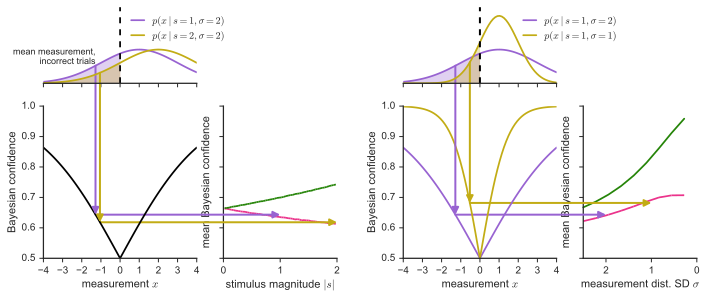

In [31]:
mpl.rcParams['xtick.major.pad']='4'
mpl.rcParams['ytick.major.pad']='4'
mpl.rcParams['xtick.major.size']='4'
mpl.rcParams['ytick.major.size']='4'
mpl.rcParams['xtick.minor.size']='4'
mpl.rcParams['ytick.minor.size']='4'
mpl.rcParams['axes.labelpad']='4'


def f(s1 = 1,
    s2 = 2,
    sig1 = 2,
    sig2 = 1,
    x_hi = 3,
    s_hi = 2,
    sig_hi = 2.5,
    sig_n = 10,
    x_n = 71, # make sure this is odd
    s_n = 10,
    px_hi = .45,
    color1 = '#9863d1',
    color2 = '#c2ac15',
    log_nTrials = 3,
    ds1_cat_type = 'uniform',
    ds2_cat_type = 'uniform',
    unif_range = 2,
    norm_SD = 0,
    lw = 2,
    arrow_scale=20,
    wspace=.3,
    hspace=.15,
    fill_alpha=.3,
    fig_w=10,
    fig_h=6,
    width_ratio=1.4,
    height_ratio=1.4,
    subplot_shift=.05
    ):

    figsize = (fig_w,fig_h) # W, H

    nTrials = int(10**log_nTrials)
    conf_yl = [.5, 1]
    px_yl = [0, px_hi]
    x_xl = [-x_hi, x_hi]
    s_xl = [0, s_hi]
    sig_xl = [sig_hi, 0]
    colors = [color1, color2]

    norm_mean = s1

    x = np.linspace(-x_hi, x_hi, x_n)
    s = np.linspace(0, s_hi, s_n)
    SDs = np.linspace(sig_hi, 0, sig_n)

    cat_params = dict(unif_range=unif_range,
         norm_mean=norm_mean,
         norm_SD=norm_SD)

    ds1_data = sg.experiment(cat_type=ds1_cat_type,
                             nTrials=int(nTrials),
                             meas_SD=sig1,
                             **cat_params)
    ds2_data = [sg.experiment(cat_type=ds2_cat_type,
                              nTrials=int(nTrials),
                              meas_SD=meas_SD,
                              **cat_params)
                for meas_SD in SDs]


    def mean_trunc_normal_below_0(loc, scale):
        return sps.truncnorm.mean(-np.inf, -loc/scale, loc, scale)

    m_inc_s1_sig1 = mean_trunc_normal_below_0(s1, sig1)
    m_inc_s2_sig1 = mean_trunc_normal_below_0(s2, sig1)
    m_inc_s1_sig2 = mean_trunc_normal_below_0(s1, sig2)

    conf_inc_s1_sig1_ds1 = sg.confidence(m_inc_s1_sig1, sig1, cat_type=ds1_cat_type, **cat_params)
    conf_inc_s2_sig1_ds1 = sg.confidence(m_inc_s2_sig1, sig1, cat_type=ds1_cat_type, **cat_params)

    conf_inc_s1_sig1_ds2 = sg.confidence(m_inc_s1_sig1, sig1, cat_type=ds2_cat_type, **cat_params)
    conf_inc_s1_sig2_ds2 = sg.confidence(m_inc_s1_sig2, sig2, cat_type=ds2_cat_type, **cat_params)

    plt.subplots(1,1,figsize=figsize)
    gs = gridspec.GridSpec(2, 4,
                       width_ratios=[width_ratio, 1, width_ratio,1],
                       height_ratios=[1, height_ratio]
                       )

    ax1 = plt.subplot(gs[0])
    ax4 = plt.subplot(gs[2])
    ax2 = plt.subplot(gs[4])
    ax3 = plt.subplot(gs[5])
    ax5 = plt.subplot(gs[6])
    ax6 = plt.subplot(gs[7])

    for a in [ax4, ax5, ax6]:
        apos = a.get_position()
        a.set_position([apos.x0+subplot_shift, apos.y0, apos.width, apos.height])


#     fig, ax = plt.subplots(2,4, figsize=figsize)
#     plt.subplots_adjust(wspace=wspace, hspace=hspace)
#     fig.delaxes(ax[0][1])
#     fig.delaxes(ax[0][3])
    sns.despine()

    dist_s1_sig1 = sps.norm(loc=s1, scale=sig1)
    dist_s2_sig1 = sps.norm(loc=s2, scale=sig1)
    ax1.plot(x, dist_s1_sig1.pdf(x), color=colors[0], label='$p(x \mid s={:g}, \sigma={:g})$'.format(s1, sig1))
    ax1.plot(x, dist_s2_sig1.pdf(x), color=colors[1], label='$p(x \mid s={:g}, \sigma={:g})$'.format(s2, sig1))
    ax1.fill_between(x[x<=0], 0, dist_s1_sig1.pdf(x)[x<=0], color=colors[0], alpha=fill_alpha)
    ax1.fill_between(x[x<=0], 0, dist_s2_sig1.pdf(x)[x<=0], color=colors[1], alpha=fill_alpha)
    
    ax1.axvline(0, color='black', linestyle='--')
    l = ax1.legend(bbox_to_anchor=(1.24, 1), handlelength=1.3)


    ax1.set(ylim=px_yl,
                 yticklabels='',
                 yticks=[],
                 xlim=x_xl,
                 xticklabels='')
    sns.despine(ax=ax1, left=True)

    conf1 = sg.confidence(x, sig1, cat_type=ds1_cat_type, **cat_params)


    ax2.plot(x, conf1, color='k')
    ax2.set(ylim=conf_yl,
                 xlim=x_xl,
                 xlabel='measurement $x$',
                 ylabel='Bayesian confidence')
    ax2.xaxis.set_major_locator(MultipleLocator(1))

    sg.plot_divergence_panel(ax3, ds1_data, nBins=s_n)
    ax3.set(xlim=s_xl,
                 ylim=conf_yl,
                 yticklabels='',
                 ylabel='mean Bayesian confidence')
    ax3.xaxis.set_major_locator(MultipleLocator(1))

    dist_s1_sig2 = sps.norm(loc=s1, scale=sig2)
    ax4.plot(x, dist_s1_sig1.pdf(x), color=colors[0], label='$p(x \mid s={:g}, \sigma={:g})$'.format(s1, sig1))
    ax4.plot(x, dist_s1_sig2.pdf(x), color=colors[1], label='$p(x \mid s={:g}, \sigma={:g})$'.format(s1, sig2))
    ax4.axvline(0, color='black', linestyle='--', linewidth=lw)
    ax4.fill_between(x[x<=0], 0, dist_s1_sig1.pdf(x)[x<=0], color=colors[0], alpha=fill_alpha)
    ax4.fill_between(x[x<=0], 0, dist_s1_sig2.pdf(x)[x<=0], color=colors[1], alpha=fill_alpha)
    l = ax4.legend(bbox_to_anchor=(1.45, 1), handlelength=1.3)

    ax4.xaxis.set_major_locator(MultipleLocator(1))
    ax4.set(ylim=px_yl,
                 yticklabels='',
                 yticks=[],
                 xlim=x_xl,
                 xticklabels='')
    sns.despine(ax=ax4, left=True)


    conf2 = sg.confidence(x, sig2, cat_type=ds2_cat_type, **cat_params)
    ax5.plot(x, conf1, color=colors[0])
    ax5.plot(x, conf2, color=colors[1])
    ax5.xaxis.set_major_locator(MultipleLocator(1))
    ax5.set(ylim=conf_yl,
                 xlim=x_xl,
                 xlabel='measurement $x$',
                 ylabel='Bayesian confidence')

    sg.plot_divergence_panel2(ax6, ds2_data, SDs, mix_white_at_inaccuracy=.6)
    ax6.set(xlim=sig_xl,
                 yticklabels='',
                 ylabel='mean Bayesian confidence')
    ax6.xaxis.set_major_locator(MultipleLocator(1))


    
    def conpatch(ax1, ax2, coord1, coord2, color):
        return ConnectionPatch(xyA=coord1, xyB=coord2,
                               coordsA='data', coordsB='data',
                               axesA=ax1, axesB=ax2,
                               arrowstyle='-|>', color=color, linewidth=lw,
                               mutation_scale=arrow_scale)


    con = conpatch(ax1, ax2, (m_inc_s1_sig1, dist_s1_sig1.pdf(m_inc_s1_sig1)), (m_inc_s1_sig1, conf_inc_s1_sig1_ds1), colors[0])
    con2 = conpatch(ax1, ax2, (m_inc_s2_sig1, dist_s2_sig1.pdf(m_inc_s2_sig1)), (m_inc_s2_sig1, conf_inc_s2_sig1_ds1), colors[1])
    con3 = conpatch(ax2, ax3, (m_inc_s1_sig1, conf_inc_s1_sig1_ds1), (s1, conf_inc_s1_sig1_ds1), colors[0])
    con4 = conpatch(ax2, ax3, (m_inc_s2_sig1, conf_inc_s2_sig1_ds1), (s2, conf_inc_s2_sig1_ds1), colors[1])

    ax1.add_artist(con)
    ax1.add_artist(con2)
    ax1.set_zorder(1)
    
    ax2.add_artist(con3)
    ax2.add_artist(con4)
    ax3.set_zorder(-1)
    
    ax1.annotate('mean measurement,\nincorrect trials',
                      xy=(m_inc_s1_sig1, dist_s1_sig1.pdf(m_inc_s1_sig1)+.01),
                      xytext=(m_inc_s1_sig1, dist_s1_sig1.pdf(m_inc_s1_sig1)+.01),
                      fontsize=9,
                      horizontalalignment='right')
                          

    con = conpatch(ax4, ax5, (m_inc_s1_sig1, dist_s1_sig1.pdf(m_inc_s1_sig1)), (m_inc_s1_sig1, conf_inc_s1_sig1_ds2), colors[0])
    con2 = conpatch(ax4, ax5, (m_inc_s1_sig2, dist_s1_sig2.pdf(m_inc_s1_sig2)), (m_inc_s1_sig2, conf_inc_s1_sig2_ds2), colors[1])
    con3 = conpatch(ax5, ax6, (m_inc_s1_sig1, conf_inc_s1_sig1_ds2), (sig1, conf_inc_s1_sig1_ds2), colors[0])
    con4 = conpatch(ax5, ax6, (m_inc_s1_sig2, conf_inc_s1_sig2_ds2), (sig2, conf_inc_s1_sig2_ds2), colors[1])

    ax4.add_artist(con)
    ax4.add_artist(con2)
    ax4.set_zorder(1)

    ax5.add_artist(con3)
    ax5.add_artist(con4)
    ax6.set_zorder(-1)
    
    plt.gcf().savefig('/Users/will/Google Drive/Will - Confidence/Manuscripts/Signatures/sigs_figs/divergence_didactic_tmp.pdf', bbox_inches='tight')

    
def s(minimum, maximum, step, value):
    return widgets.FloatSlider(min=minimum, max=maximum, step=step, value=value, continuous_update=False)

widgets.interact(f,
                 s1=s(0, 5, .25, 1),
                 s2=s(0, 5, .25, 2),
                 sig1=s(0, 5, .25, 2),
                 sig2=s(0, 5, .25, 1),
                 x_hi=s(1, 10, .5, 4),
                 s_hi=s(1, 10, .5, 2),
                 s_n=s(1,100,1,50), # 80?
                 sig_n=s(1,100,1,10), # 30?
                 sig_hi=s(1,6,.5,2.5),
                 ds1_cat_type=widgets.Dropdown(options=['uniform','gaussian']),
                 ds2_cat_type=widgets.Dropdown(options=['uniform','gaussian']),
                 unif_range=s(1,50,.5,2),
                 norm_SD=s(0,5,.25,0),
                 lw=s(0,5,.1,2),
                 arrow_scale=s(0,100,2,14),
                 log_nTrials=s(2,7,.1,6.7), # 6.4?
                 fig_w=s(4,15,.5,11),
                 fig_h=s(2,15,.5,4.5),
                 width_ratio=s(1,2,.05,1.35),
                 height_ratio=s(1,2,.05,2),
                 subplot_shift=s(0,.3,.01,.05))
                 